In [92]:
## for data
import pandas as pd
import numpy as np
import re
from datetime import datetime
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for machine learning
from sklearn import metrics, preprocessing
## for deep learning
from tensorflow.keras import models, layers, utils  #(2.6.0)

In [93]:
columns_user = ['user_id','movie_id','rating','timestamp']
df_user = pd.read_csv('./recomm sys dataset/u.data',sep = '\t',names=columns_user)

In [94]:
df_user

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [95]:
item_columns = ['movie_id','movie_title','release_date','video_release_date',
              'IMDb_URL','unknown','Action','Adventure','Animation',
              'Children\'s','Comedy','Crime','Documentary','Drama','Fantasy',
              'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'
]
df_item = pd.read_csv('./recomm sys dataset/u.item',sep='|',encoding='latin-1',names= item_columns)

In [96]:
#Dropping the unecessary columns
#df_user = df_user.drop('timestamp',axis = 1)
df_item = df_item.drop(['release_date','video_release_date','IMDb_URL','unknown'],axis=1)

In [97]:
print(df_user.shape)
print(df_item.shape)

(100000, 4)
(1682, 20)


In [98]:
#Cleaning the Item dataset and feature engineering.

In [99]:
df_item["name"] = df_item["movie_title"].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip())

In [100]:
df_item

,movie_id,movie_title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,name
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Toy Story
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,GoldenEye
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,Four Rooms
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,Get Shorty
4,5,Copycat (1995),0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,Copycat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Mat' i syn
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,B. Monkey
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,Sliding Doors
1680,1681,You So Crazy (1994),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,You So Crazy


In [101]:
def extract_year(s):
    a = re.findall('\d+',s)
    if len(a) != 0:
        if len(a) == 1:
            return int(a[0])
        else:
            return int(a[-1])
    else:
        return np.nan

In [102]:
df_item["date"] = df_item["movie_title"].apply(extract_year)

In [103]:
df_item["date"] = df_item["date"].fillna(9999)

In [104]:
df_item["old"] = df_item["date"].apply(lambda x: 1 if x < 2000 else 0)

In [105]:
df_item["product"] = range(0,len(df_item))

In [106]:
df_item.columns

Index(['movie_id', 'movie_title', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'name', 'date', 'old', 'product'],
      dtype='object')

In [107]:
# Cleaning the user dataset and feature engineering.

In [108]:
df_user["user"] = df_user["user_id"].apply(lambda x: x-1)

In [109]:
df_user["timestamp"] = df_user["timestamp"].apply(lambda x: datetime.fromtimestamp(x))

In [110]:
df_user["daytime"] = df_user["timestamp"].apply(lambda x: 1 if 6<int(x.strftime("%H"))<20 else 0)

In [111]:
df_user["weekend"] = df_user["timestamp"].apply(lambda x: 1 if x.weekday() in [5,6] else 0)

In [112]:
df_user = df_user.merge(df_item[["movie_id","name"]], how="left")

In [114]:
df_user = df_user.rename(columns={"rating":"y"})

In [115]:
df_item = df_item[["product","name","old",'old', 'Action', 'Adventure', 'Animation', 'Children\'s',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western',]].set_index("product")

In [116]:
df_user

,user_id,movie_id,y,timestamp,user,daytime,weekend,name
0,196,242,3,1997-12-04 10:55:49,195,1,0,Kolya
1,186,302,3,1998-04-04 15:22:22,185,1,1,L.A. Confidential
2,22,377,1,1997-11-07 02:18:36,21,0,0,Heavyweights
3,244,51,2,1997-11-27 00:02:03,243,0,0,Legends of the Fall
4,166,346,1,1998-02-02 00:33:16,165,0,0,Jackie Brown
...,...,...,...,...,...,...,...,...
99995,880,476,3,1997-11-22 00:10:44,879,0,1,"First Wives Club, The"
99996,716,204,5,1997-11-17 14:39:03,715,1,0,Back to the Future
99997,276,1090,1,1997-09-20 18:49:55,275,1,1,Sliver
99998,13,225,2,1997-12-17 17:52:36,12,1,0,101 Dalmatians


In [117]:
df_item

,name,old,old,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
product,,,,,,,,,,,,,,,,,,,,,
0,Toy Story,1,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GoldenEye,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Four Rooms,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Get Shorty,1,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Copycat,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,Mat' i syn,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,B. Monkey,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,Sliding Doors,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [119]:
df_user = df_user[["user","movie_id","daytime","weekend","y"]]

In [120]:
df_context = df_user[["user","movie_id","daytime","weekend"]]

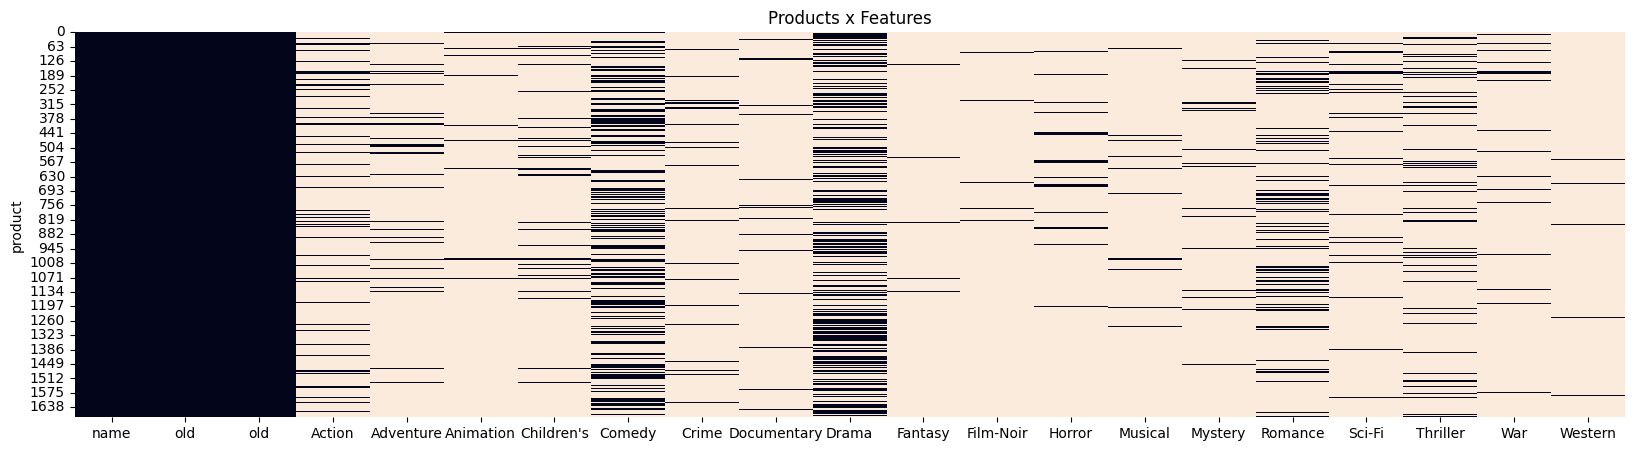

In [121]:
fig, ax = plt.subplots(figsize=(20,5))
sns.heatmap(df_item==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title("Products x Features")
plt.show()

In [124]:
tmp = df_user.copy()
df_user_pivot = tmp.pivot_table(index="user", columns="movie_id", values="y")

In [125]:
df_user_pivot

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user,,,,,,,,,,,,,,,,,,,,,
0,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df_user_pivot = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5,1)).fit_transform(df_user_pivot.values), 
columns=df_user_pivot.columns, index=df_user_pivot.index)

In [127]:
df_user_pivot

movie_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user,,,,,,,,,,,,,,,,,,,,,
0,1.000,0.75,0.875,0.750,0.75,1.0,0.875,0.5,1.00,0.750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.875,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,0.625,NaN,NaN,0.875,1.0,0.75,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,1.000,NaN,NaN,NaN,NaN,NaN,0.875,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
split = int(0.8*df_user_pivot.shape[1])
df_train_user = df_user_pivot.loc[:, :split-1]
df_test_user = df_user_pivot.loc[:, split:]

In [129]:
features = ['old', 'Action', 'Adventure', 'Animation', 'Children\'s',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western']

context = ['daytime','weekend']

In [130]:
train = df_train_user.stack(dropna=True).reset_index().rename(columns={0:"y"})

In [131]:
train

,user,movie_id,y
0,0,1,1.000000
1,0,2,0.750000
2,0,3,0.875000
3,0,4,0.750000
4,0,5,0.750000
...,...,...,...
98760,942,1067,0.625000
98761,942,1074,0.875000
98762,942,1188,0.750000
98763,942,1228,0.833333


In [132]:
train = train.merge(df_item[features], how="left", left_on="movie_id", right_index=True)

In [133]:
train

,user,movie_id,y,old,old,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1.000000,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,0.750000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,3,0.875000,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,4,0.750000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,5,0.750000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98760,942,1067,0.625000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98761,942,1074,0.875000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98762,942,1188,0.750000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98763,942,1228,0.833333,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [134]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [136]:
embed = nn.Embedding(10,3)
embed.weight

Parameter containing:
tensor([[ 1.1970, -0.0824, -0.5489],
        [ 0.7460, -0.9039, -0.2963],
        [-1.2433,  0.0425,  0.2709],
        [ 0.1998,  2.1950, -1.3692],
        [ 0.3597, -1.3764,  0.6240],
        [ 1.1099,  1.1913,  0.4853],
        [ 0.4923, -0.1818, -0.8834],
        [-1.1043, -0.9149, -1.1251],
        [ 0.5446, -0.5782,  0.8841],
        [-0.8900,  0.8150,  1.0566]], requires_grad=True)

In [138]:
a = torch.LongTensor([[1,0,1,4,5,1]])
embed(a)

tensor([[[ 0.7460, -0.9039, -0.2963],
         [ 1.1970, -0.0824, -0.5489],
         [ 0.7460, -0.9039, -0.2963],
         [ 0.3597, -1.3764,  0.6240],
         [ 1.1099,  1.1913,  0.4853],
         [ 0.7460, -0.9039, -0.2963]]], grad_fn=<EmbeddingBackward0>)

# Matrix Factorization model.

In [139]:
class MF(nn.Module):
    def __init__ (self, num_users, num_items, emd_size=100):
        super(MF, self).__init__()
        self.user_emb = nn.Embedding(num_users,emd_size)
        self.item_emb = nn.Embedding(num_item,emd_size)
        #Intitalizing weights
        self.user_emb.weight.data.uniform_(0,0.05)
        self.item_emb.weight.data.uniform_(0,0.05)
        
    def forward(self, u ,v):
        u = self.user_emb(u)
        v = self.item_emb(v)
        return (u*v).sum(1)

In [143]:
train

,user,movie_id,y,old,old,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,1.000000,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,2,0.750000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,3,0.875000,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,4,0.750000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,5,0.750000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98760,942,1067,0.625000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98761,942,1074,0.875000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98762,942,1188,0.750000,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98763,942,1228,0.833333,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
